# Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

## Processing Speeches with SpaCy

In [1]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [2]:
sou = pd.read_csv("data/SOTU.csv")
sou_2000 = sou[sou["Year"] >= 2000].copy()
sou_2000.shape

(25, 4)

In [3]:
docs_2000 = []

for speech in tqdm(sou_2000["Text"], desc="Processing speeches"):
    doc = nlp(speech)
    docs_2000.append(doc)

Processing speeches: 100%|██████████| 25/25 [00:27<00:00,  1.11s/it]


## Analyze Tokens with Lemmas

In [4]:
sou_2000["doc"] = docs_2000
sou_2000.head()

,President,Year,Text,Word Count,doc
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003,"(\n, [, Before, speaking, ,, the, President, p..."
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978,"(\n, The, President, ., Mr., Speaker, —, —, \n..."
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539,"(\n, The, President, ., Thank, you, all, very,..."
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734,"(\n, The, President, ., Thank, you, ., Thank, ..."
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169,"(\n, The, President, ., Thank, you, very, much..."


In [5]:
all_tokens = []

for doc in sou_2000["doc"]:
    for token in doc:
        if (not token.is_stop) and (not token.is_punct) and (not token.is_space):
            all_tokens.append(token.text.lower())

In [6]:
len(all_tokens)

75983

In [7]:
all_lemmas = []

for doc in sou_2000["doc"]:
    for token in doc:
        if (not token.is_stop) and (not token.is_punct) and (not token.is_space):
            all_lemmas.append(token.lemma_.lower())

In [8]:
token_counts = Counter(all_tokens)
lemma_counts = Counter(all_lemmas)

token_top20 = token_counts.most_common(20)
lemma_top20 = lemma_counts.most_common(20)

In [9]:
token_top20

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

In [10]:
lemma_top20

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

The top lemmas appear more “semantic” and stable compared to the top tokens.
Tokens such as “year” and “years” appear separately in the token list, but are merged into the single lemma “year”, making it appear with a much higher count in the lemma frequency table.
Similarly, “child” and “children” are merged into the lemma “child”, increasing its rank among the most common lemmas.
Lemmatization therefore reduces sparsity and provides a clearer representation of the underlying meaning in the speeches.

## Common Words

In [11]:
def get_top_n_lemmas(df, year, n=20):
    """
    Returns the top n lemmas for speeches in a given year.
    
    Inputs:
        df  : raw (unprocessed) sou dataframe
        year: year of interest (int or string)
        n   : number of top lemmas to return
        
    Output:
        A list of (lemma, count) tuples sorted by frequency.
    """
    
    # Ensure the year column is of integer type
    df["Year"] = df["Year"].astype(int)
    
    # Subset the dataframe for the target year
    subset = df[df["Year"] == int(year)]
    
    # Process each speech in this year using spaCy
    docs = [nlp(text) for text in subset["Text"]]
    
    # Collect lemmas while excluding stop words, punctuation, and spaces
    lemmas = []
    for doc in docs:
        for token in doc:
            if (not token.is_stop) and (not token.is_punct) and (not token.is_space):
                lemmas.append(token.lemma_.lower())
    
    # Count occurrences and return the top n
    counts = Counter(lemmas).most_common(n)
    return counts

In [12]:
# test it on 2024
words_2024 = get_top_n_lemmas(sou, 2024, n=10)
words_2024

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

In [13]:
words_2017 = get_top_n_lemmas(sou, 2017, n=20)
words_2023 = get_top_n_lemmas(sou, 2023, n=20)

words_2017, words_2023

([('american', 34),
  ('america', 29),
  ('country', 26),
  ('nation', 21),
  ('great', 20),
  ('new', 19),
  ('year', 19),
  ('world', 18),
  ('job', 15),
  ('people', 15),
  ('americans', 14),
  ('united', 13),
  ('tonight', 13),
  ('states', 12),
  ('work', 12),
  ('child', 12),
  ('want', 12),
  ('time', 12),
  ('citizen', 11),
  ('right', 11)],
 [('year', 58),
  ('go', 56),
  ('let', 45),
  ('know', 40),
  ('people', 39),
  ('job', 38),
  ('america', 36),
  ('come', 33),
  ('law', 33),
  ('pay', 33),
  ('american', 31),
  ('$', 31),
  ('president', 30),
  ('look', 27),
  ('world', 25),
  ('folk', 24),
  ('nation', 24),
  ('audience', 23),
  ('work', 23),
  ('right', 23)])

In [14]:
df_2017 = pd.DataFrame(words_2017, columns=["word", "count"])
df_2023 = pd.DataFrame(words_2023, columns=["word", "count"])

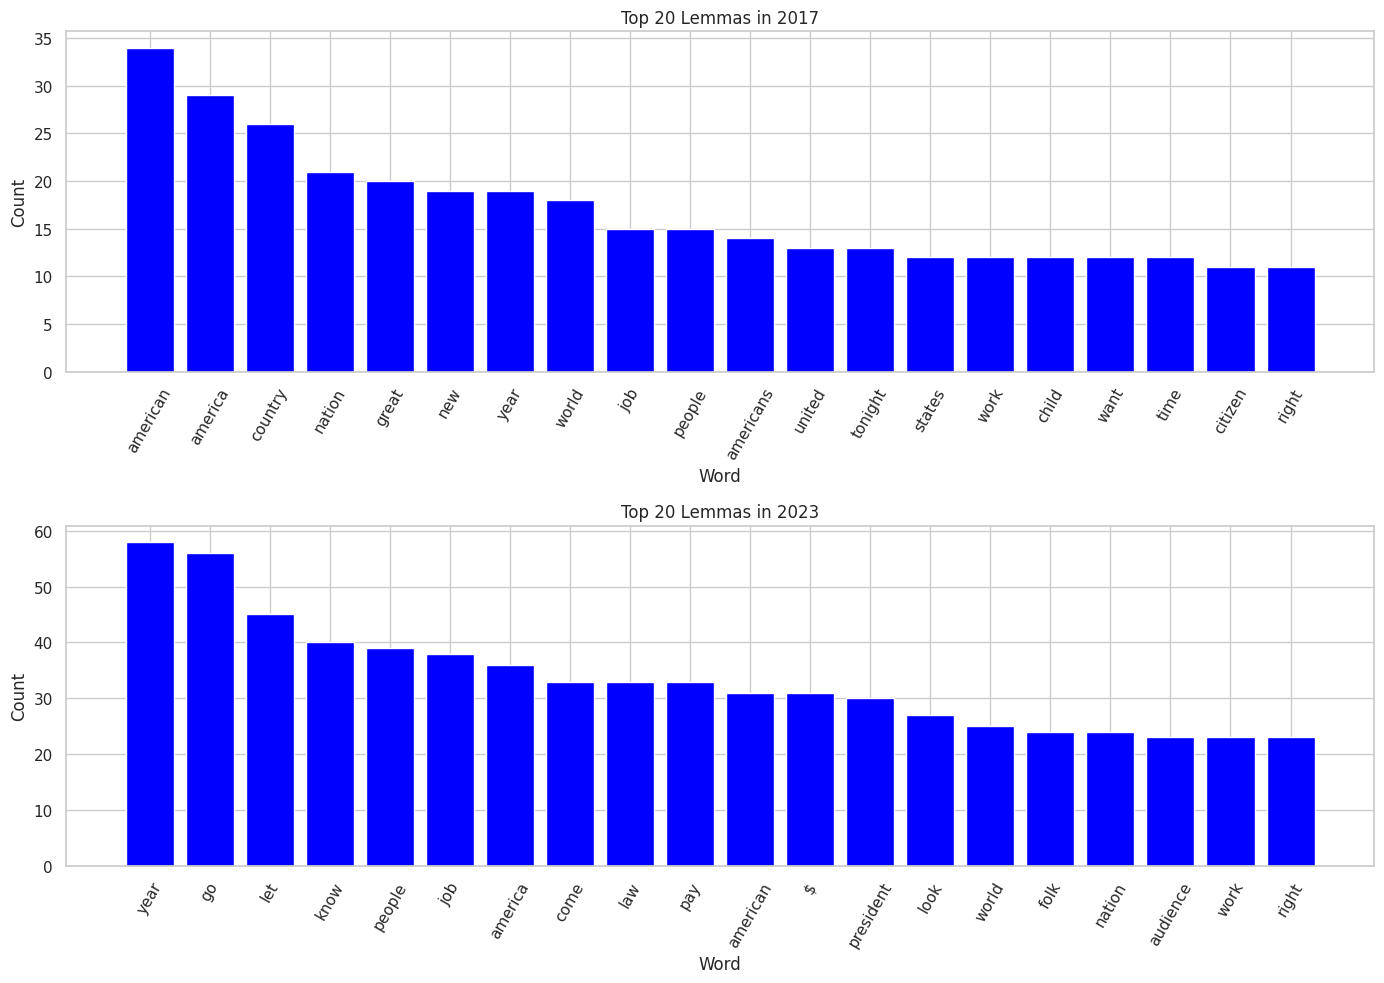

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.0)

# Create subplots vertically stacked
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

##########################
#       2017 Plot        #
##########################

axes[0].bar(df_2017["word"], df_2017["count"], color="blue")
axes[0].set_title("Top 20 Lemmas in 2017")
axes[0].set_xlabel("Word")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=60)

##########################
#       2023 Plot        #
##########################

axes[1].bar(df_2023["word"], df_2023["count"], color="blue")
axes[1].set_title("Top 20 Lemmas in 2023")
axes[1].set_xlabel("Word")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=60)

plt.tight_layout()
fig.savefig("outputs/common_words_2017_2023.png", dpi=300, bbox_inches="tight")
plt.show()

## TF-IDF Vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Convert speech column to list (as required)
raw_docs = sou["Text"].to_list()

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform raw documents into TF-IDF matrix
vectorized_docs = vectorizer.fit_transform(raw_docs)

In [17]:
# Convert sparse matrix to dense array
dense_matrix = vectorized_docs.toarray()

# Fit PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dense_matrix)

# Create DataFrame for PCA results
pca_df = pd.DataFrame({
    "PC1": pca_components[:, 0],
    "PC2": pca_components[:, 1],
    "year": sou["Year"].astype(int)
})

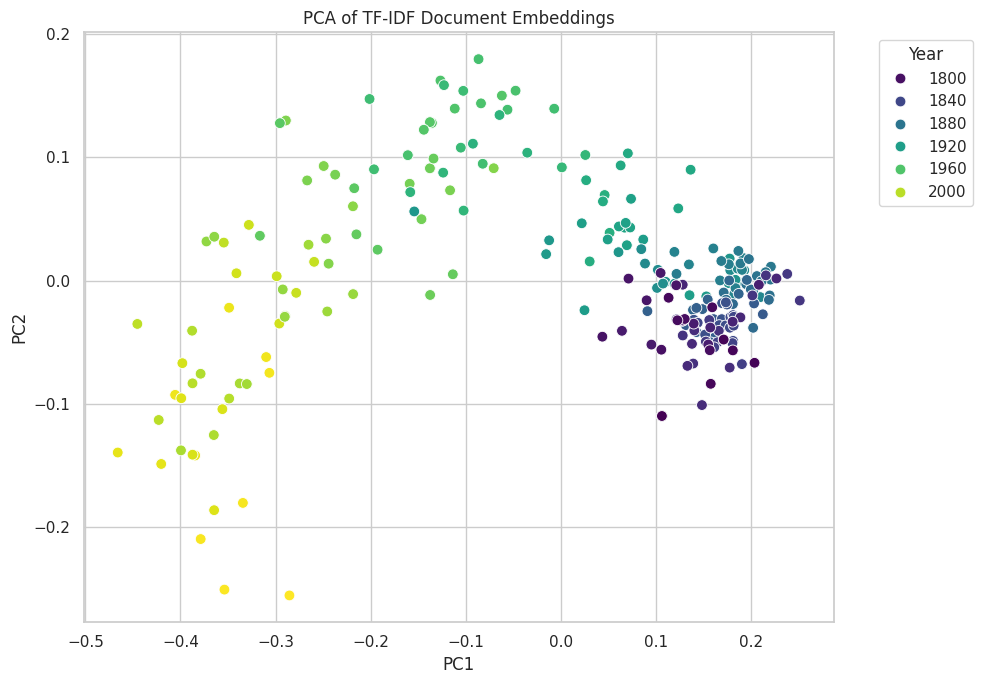

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="year",
    palette="viridis",
    s=60
)
plt.title("PCA of TF-IDF Document Embeddings")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("outputs/PCA.png", dpi=300)
plt.show()

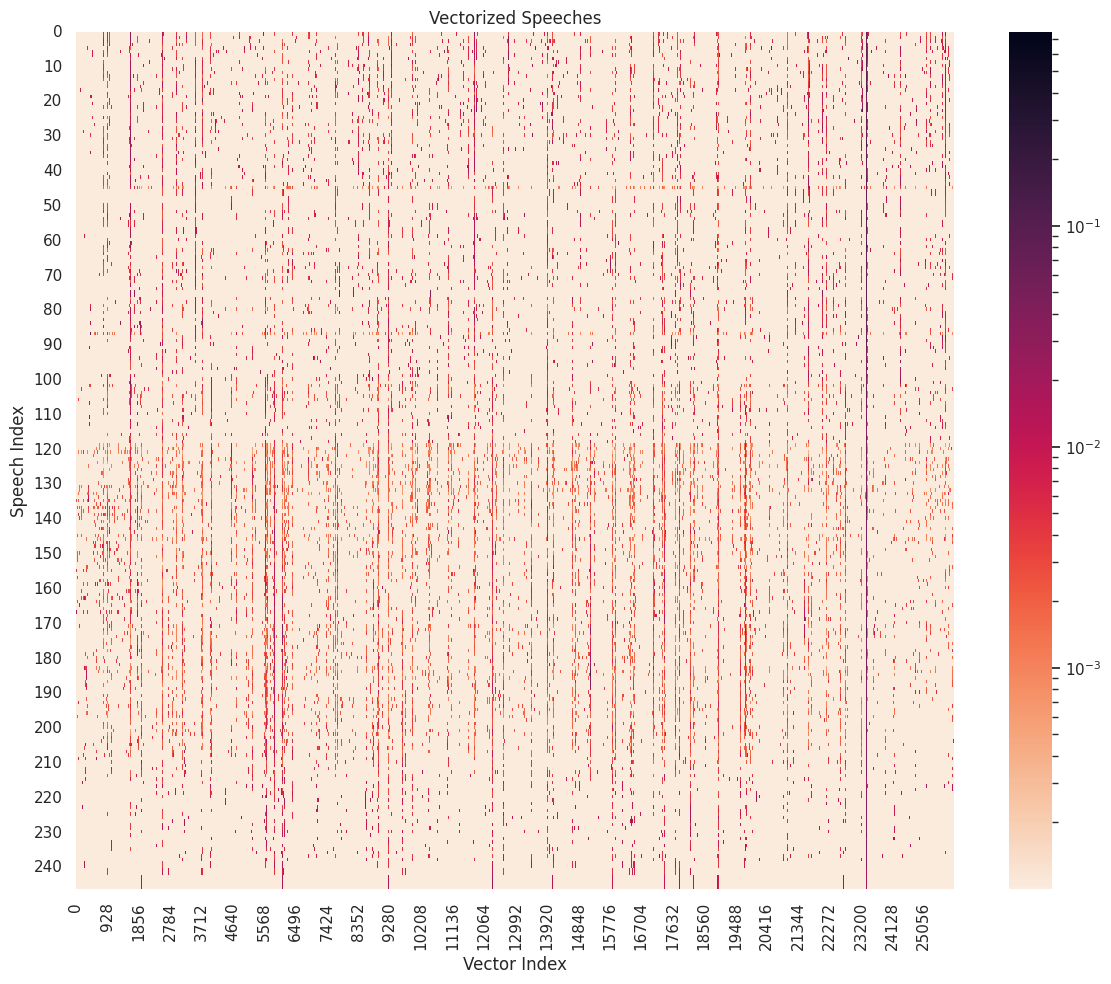

In [19]:
from matplotlib.colors import LogNorm

eps = 1e-4
dense_nonzero = np.where(dense_matrix == 0, eps, dense_matrix)

plt.figure(figsize=(12, 10))

sns.heatmap(
    dense_nonzero,
    cmap="rocket_r",
    norm=LogNorm(vmin=dense_nonzero.min(), vmax=dense_nonzero.max()),
    cbar_kws={"ticks":[1e-3, 1e-2, 1e-1]},
)

# Title
plt.title("Vectorized Speeches")

# Axis labels
plt.xlabel("Vector Index")
plt.ylabel("Speech Index")

# Set y-axis ticks every 10 speeches
plt.yticks(ticks=np.arange(0, dense_nonzero.shape[0], 10),
           labels=np.arange(0, dense_nonzero.shape[0], 10))

plt.xticks(
    ticks=np.arange(0, dense_nonzero.shape[1], 928),
    labels=np.arange(0, dense_nonzero.shape[1], 928)
)
plt.tight_layout()
plt.savefig("outputs/TF-IDF.png", dpi=300)
plt.show()

In [20]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world']

word_nums = [vectorizer.vocabulary_.get(w) for w in word_list]
idf_score = [vectorizer.idf_[i] if i is not None else None for i in word_nums]
# Extract row 0 from dense matrix (first speech)
first_speech = dense_matrix[0]

tf_idf = []
for idx in word_nums:
    if idx is not None:
        tf_idf.append(first_speech[idx])
    else:
        tf_idf.append(None)

pd.DataFrame({
    "Word": word_list,
    "IDF Score": idf_score,
    "TF-IDF Score": tf_idf
})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
